<a href="https://colab.research.google.com/github/ramrajv/AI_Fin/blob/main/AutoTS_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet

In [3]:
# finaldf = pd.read_csv('predictions.csv')

In [4]:
import datetime
days = 300
Previous_Date = datetime.datetime.today() - datetime.timedelta(days=days)

In [25]:
ticker = '^NSEI'
# ^NSEI, ^NSEBANK
df = yf.download(ticker, start = Previous_Date)
# ,start='2020-01-01'

[*********************100%***********************]  1 of 1 completed


In [26]:
df.reset_index(inplace = True)

In [27]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-27,17062.000000,17182.500000,16866.750000,17110.150391,17110.150391,395600
1,2022-01-28,17208.300781,17373.500000,17077.099609,17101.949219,17101.949219,355300
2,2022-01-31,17301.050781,17410.000000,17264.150391,17339.849609,17339.849609,321700
3,2022-02-01,17529.449219,17622.400391,17244.550781,17576.849609,17576.849609,386400
4,2022-02-02,17706.199219,17794.599609,17674.800781,17780.000000,17780.000000,271200


In [28]:
df.shape

(203, 7)

In [29]:
df.sort_values('Date', inplace = True)

In [30]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
198,2022-11-16,18398.250000,18442.150391,18344.150391,18409.650391,18409.650391,219300
199,2022-11-17,18358.699219,18417.599609,18312.949219,18343.900391,18343.900391,200500
200,2022-11-18,18382.949219,18394.599609,18209.800781,18307.650391,18307.650391,198800
201,2022-11-21,18246.400391,18262.300781,18133.349609,18159.949219,18159.949219,213800
202,2022-11-22,18179.150391,18206.900391,18137.699219,18198.250000,18198.250000,0


In [31]:
# Metric MAE
from sklearn.metrics import mean_absolute_error

# Imports for creating plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7
# %matplotlib notebook

In [32]:
split = int(round(len(df)*0.7,0))
train_data = df.iloc[:split]
test_data = df.iloc[split:]

In [33]:
split

142

## Forecasting using Auto TS

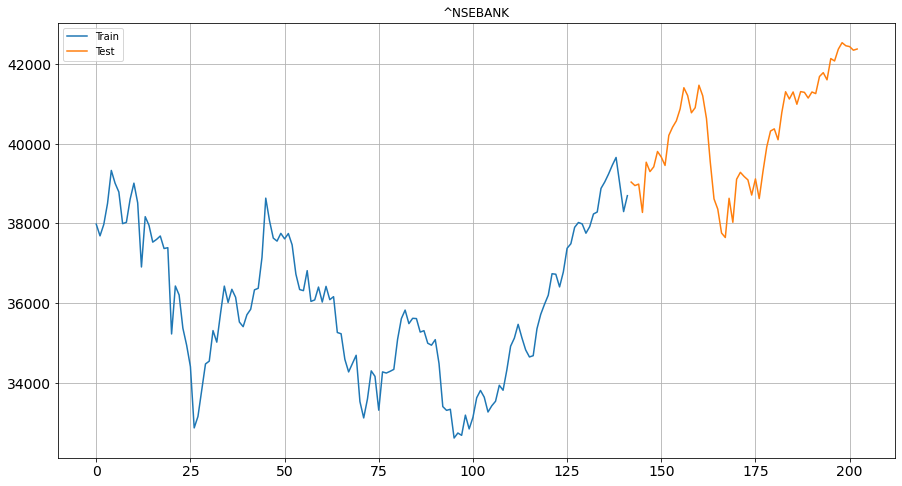

In [14]:
train_data.Close.plot(figsize=(15,8), title= ticker, fontsize=14, label='Train')
test_data.Close.plot(figsize=(15,8), title= ticker, fontsize=14, label='Test')
plt.legend()
plt.grid()
plt.show()

In [15]:
!pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 672 kB 5.0 MB/s 


In [34]:
from autots import AutoTS

In [35]:
model = AutoTS(forecast_length=3, frequency='infer',  ensemble='simple', drop_data_older_than_periods=split)

In [ ]:
mod = model.fit(df, date_col = 'Date', value_col = 'Close', id_col = None)

Inferred frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
Model Number: 2 with model ARIMA in generation 0 of 10
Model Number: 3 with model ARIMA in generation 0 of 10


## Best Model

In [ ]:
print(mod)

## Prediction and Forecasting

In [ ]:
pred = model.predict()
forecast = pred.forecast
model_results = model.results()
validation = model.results('validation')

Let’s print the forecast of the dataset for the future stock price. Also, we will see the validation of the model results. 

In [ ]:
# Forecast
print(forecast.astype(int))